In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ('/content/dementia_dataset.csv')
df = pd.read_csv(path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#melihat informasi dari tabel seperti melihat tipe datanya apa dan jumlah kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
#melihat nilai unik dari sebuah kolom disini target nya memiliki 3 nilai yang berbeda
data.nunique()

,0
Subject ID,150
MRI ID,373
Group,3
Visit,5
MR Delay,201
M/F,2
Hand,1
Age,39
EDUC,12
SES,5


In [ ]:
# melihat ringkasan statistik deskriptif
data.describe()
#disini kita bisa melihat nilai mean,median , standar deviasi nilai minimal dan maximal dan nilai quartile 25% quartile 1 50% quartile 2 atau mean 75% nilai quartile 3

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# melihat apakah ada missing value?
#melihat data yang hilang ada berapa di setiap kolomnya
data.isna().sum()

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,19


In [ ]:
# melihat apakah ada data duplikat?
data.duplicated().sum()

0

In [ ]:
#membantu kita mengisi data yang hilang dengan nilai yang paling sering muncul (mode) atau nilai rata-rata (mean).

# Imputing missing values in the 'SES' column with the mode
data.SES.fillna(data.SES.mode()[0], inplace=True)

# Imputing missing values in the 'MMSE' column with the mean
data.MMSE.fillna(data.MMSE.mean(), inplace=True)

data.isna().sum()

<ipython-input-8-8dbd0a00fafe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.SES.fillna(data.SES.mode()[0], inplace=True)
<ipython-input-8-8dbd0a00fafe>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
Subject ID,0
MRI ID,0
Group,0
Visit,0
MR Delay,0
M/F,0
Hand,0
Age,0
EDUC,0
SES,0


In [ ]:
#Semua kolom bertipe object perlu diubah menjadi tipe numeric agar dapat diproses oleh algoritma KNN,
#karena KNN hanya dapat menangani data bertipe numeric
#kita disini menggunakan label encoder untuk mengubahnya
le = LabelEncoder()
data['Subject ID'] = le.fit_transform(data['Subject ID'])
data['MRI ID'] = le.fit_transform(data['MRI ID'])
data['Group'] = le.fit_transform(data['Group'])
data['M/F'] = le.fit_transform(data['M/F'])
data['Hand'] = le.fit_transform(data['Hand'])

In [ ]:
data.info()
#data yang bertipe objek berubah menjadi numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    int64  
 1   MRI ID      373 non-null    int64  
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    int64  
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(10)
memory usage: 43.8 KB


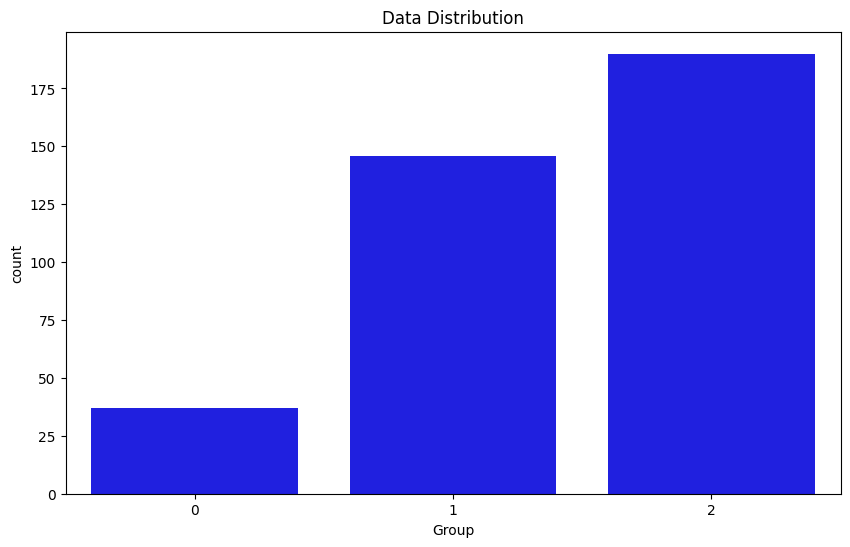

In [ ]:
#disini kita melihat persebaran datanya disini terlihat bahwa persebaran datanya tidak merata
#ini dapat mempengaruhi hasil akurasi dari model kita nanti
plt.figure(figsize=(10,6))
fig = sns.countplot(x='Group', data=data , color='blue')
fig.set_title('Data Distribution')
plt.show()

In [ ]:
#memisahkan variable dependen dan independen
#dependen variable yang nilainya bergantung pada variable lain biasanya target
#independen varibale yang nilainya tidak bergantung pada variable lain biasanya fitur
X = data.drop(columns='Group')
y = data['Group']

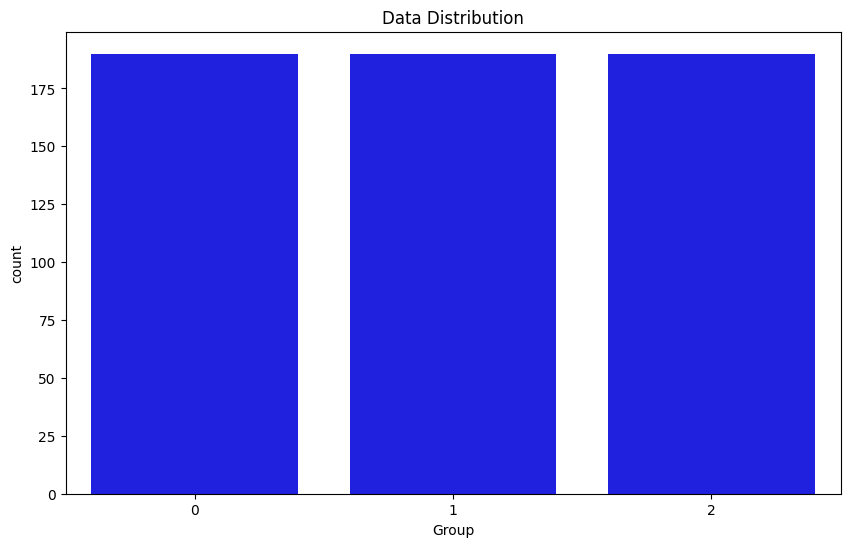

In [ ]:
#disini kita upscaling datanya agar peserbaran data agar si model tidak memiliki bias terhadap target
#jadi kita membuat si target dilatih merata
fig = plt.figure(figsize=(10,6))
sm = SMOTE()
X, y = sm.fit_resample(X, y)
sns.countplot(x=y , color='blue')
plt.title('Data Distribution')
plt.show()

In [ ]:
#kemudian kita scaling variable fiturnya di range 0 - 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#memisahkan train dan test dibagi menjadi 80% train 20% test dengan random state 42 agar selalu menghasilkan hasil yang sama
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#lalu kita tentuin knnnya kita akan mengambil 3 tetangga terdekatnya dan p2 yang artinya kita akan menggunakan euclidean distance untuk menghitung
#jarak antar data
knn = KNeighborsClassifier(n_neighbors=3, p=2)
#disini kita modelnya
knn.fit(x_train, y_train)
#terus kita prediksi hasilnya
y_pred = knn.predict(x_test)

In [ ]:
#disni kita melihat hasil dari model kita kita mendapatkan accuracy yaitu 114 yang dimana ini cukup bagus untuk model
#precision score digunakan untnk mengukur seberapa banyak prediksi yang benar contoh nya kita liat dalam label  memiliki akurasi sebanyak 95% berarti dia berhasil di predisksi 0
#recall ini adalah berapa persen data yang berhasil di deketsi maksudnya misal kita punya 19 nilai 1 tapi si model hanya bisa menemukan 18 berarti recall scorenya 95%
#f1 method rata rata dari precision score dan recall score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        33
           1       1.00      0.86      0.93        43
           2       0.94      0.76      0.84        38

    accuracy                           0.86       114
   macro avg       0.88      0.86      0.86       114
weighted avg       0.89      0.86      0.86       114



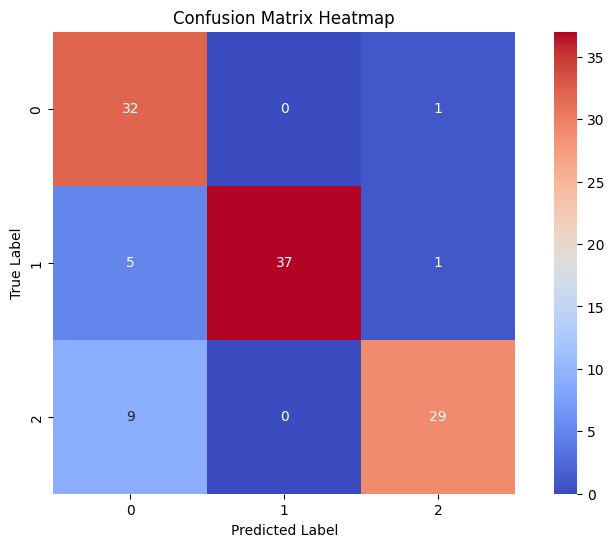

In [ ]:
#Nilai 33 pada sel [0,0] menunjukkan bahwa 33 sampel dengan true label 0 berhasil diprediksi dengan benar sebagai label 0.
#Tidak ada kesalahan prediksi pada baris ini, artinya tidak ada sampel true label 0 yang diprediksi salah. berikutnya juga
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)

# Assuming 'y' contains the target variable data
# and you want unique labels for the heatmap axes
y_set = sorted(list(set(y))) # Get unique values from 'y' and sort them

sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", square=True, xticklabels=y_set, yticklabels=y_set)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
path = ('/content/dementia_dataset.csv')
df = pd.read_csv(path)
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


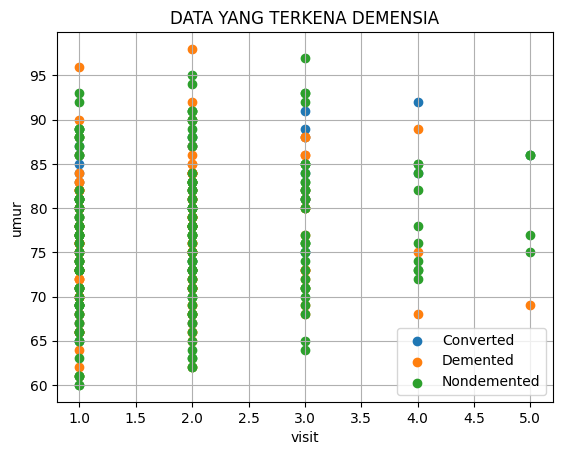

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for Group, d in df.groupby('Group'):
    ax.scatter(d['Visit'], d['Age'], label=Group)

plt.legend()
plt.title('DATA YANG TERKENA DEMENSIA')
plt.xlabel('visit')
plt.ylabel('umur')
plt.grid(True)
plt.show()